       belongs_to_collection        budget             id    popularity  \
count           45376.000000  4.537600e+04   45463.000000  45376.000000   
mean                0.098907  4.232604e+06  108359.918813      2.926458   
std                 0.298540  1.743986e+07  112460.749278      6.009672   
min                 0.000000  0.000000e+00       2.000000      0.000000   
25%                 0.000000  0.000000e+00   26449.500000      0.388840   
50%                 0.000000  0.000000e+00   60003.000000      1.130454   
75%                 0.000000  0.000000e+00  157328.000000      3.691695   
max                 1.000000  3.800000e+08  469172.000000    547.488298   

            revenue       runtime  vote_average    vote_count  release_year  \
count  4.537600e+04  45130.000000  45376.000000  45376.000000  45376.000000   
mean   1.123010e+07     94.181675      5.624070    110.096439   1991.881193   
std    6.438996e+07     38.341059      1.915423    491.742894     24.055360   
min    0

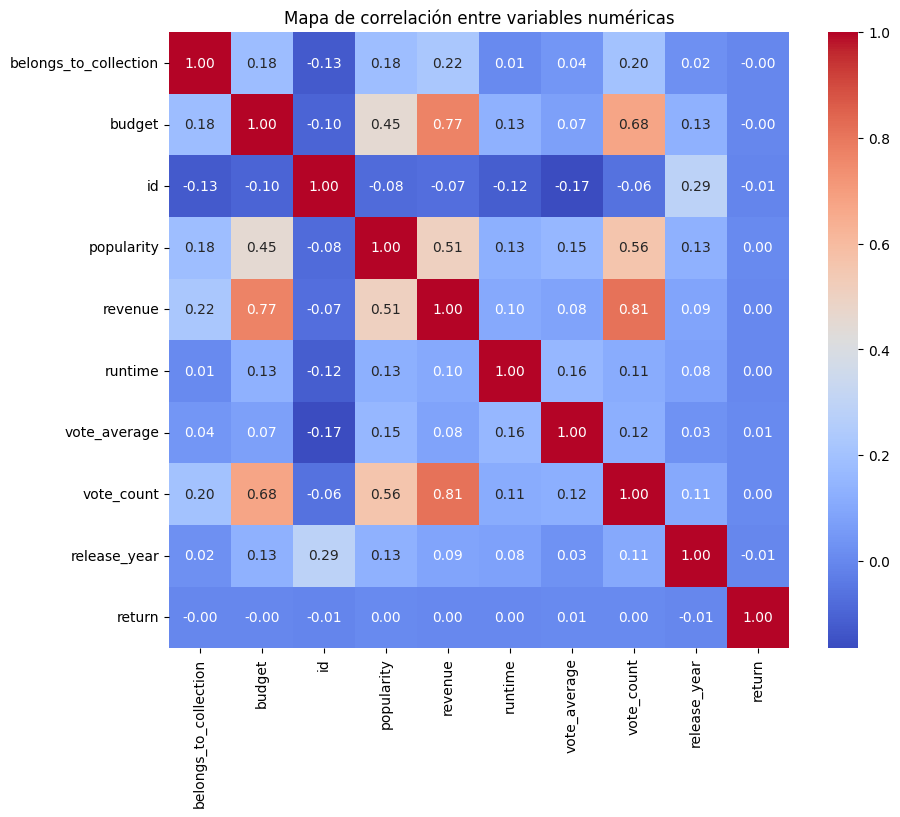

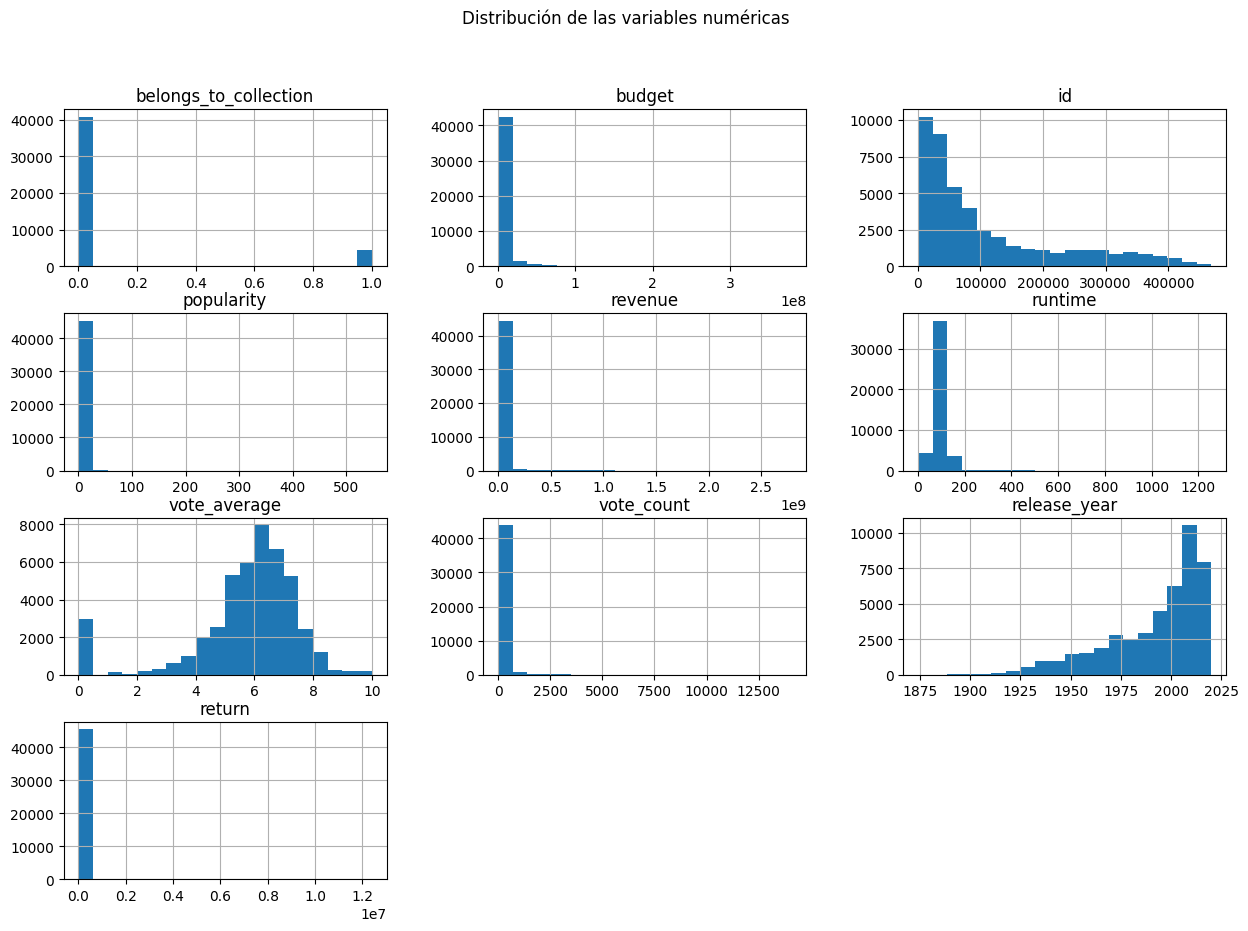

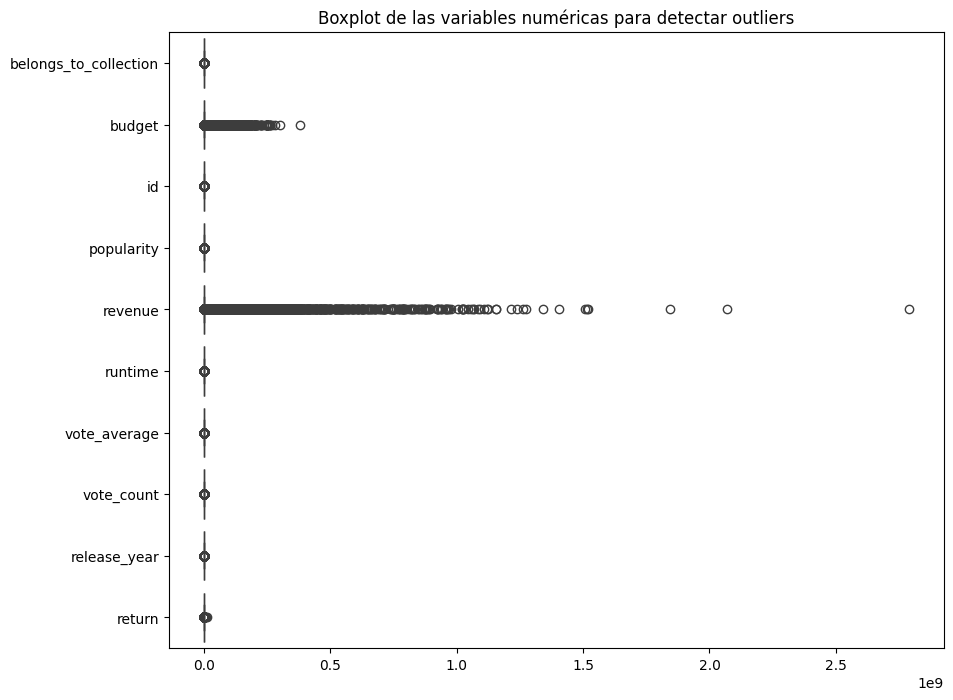

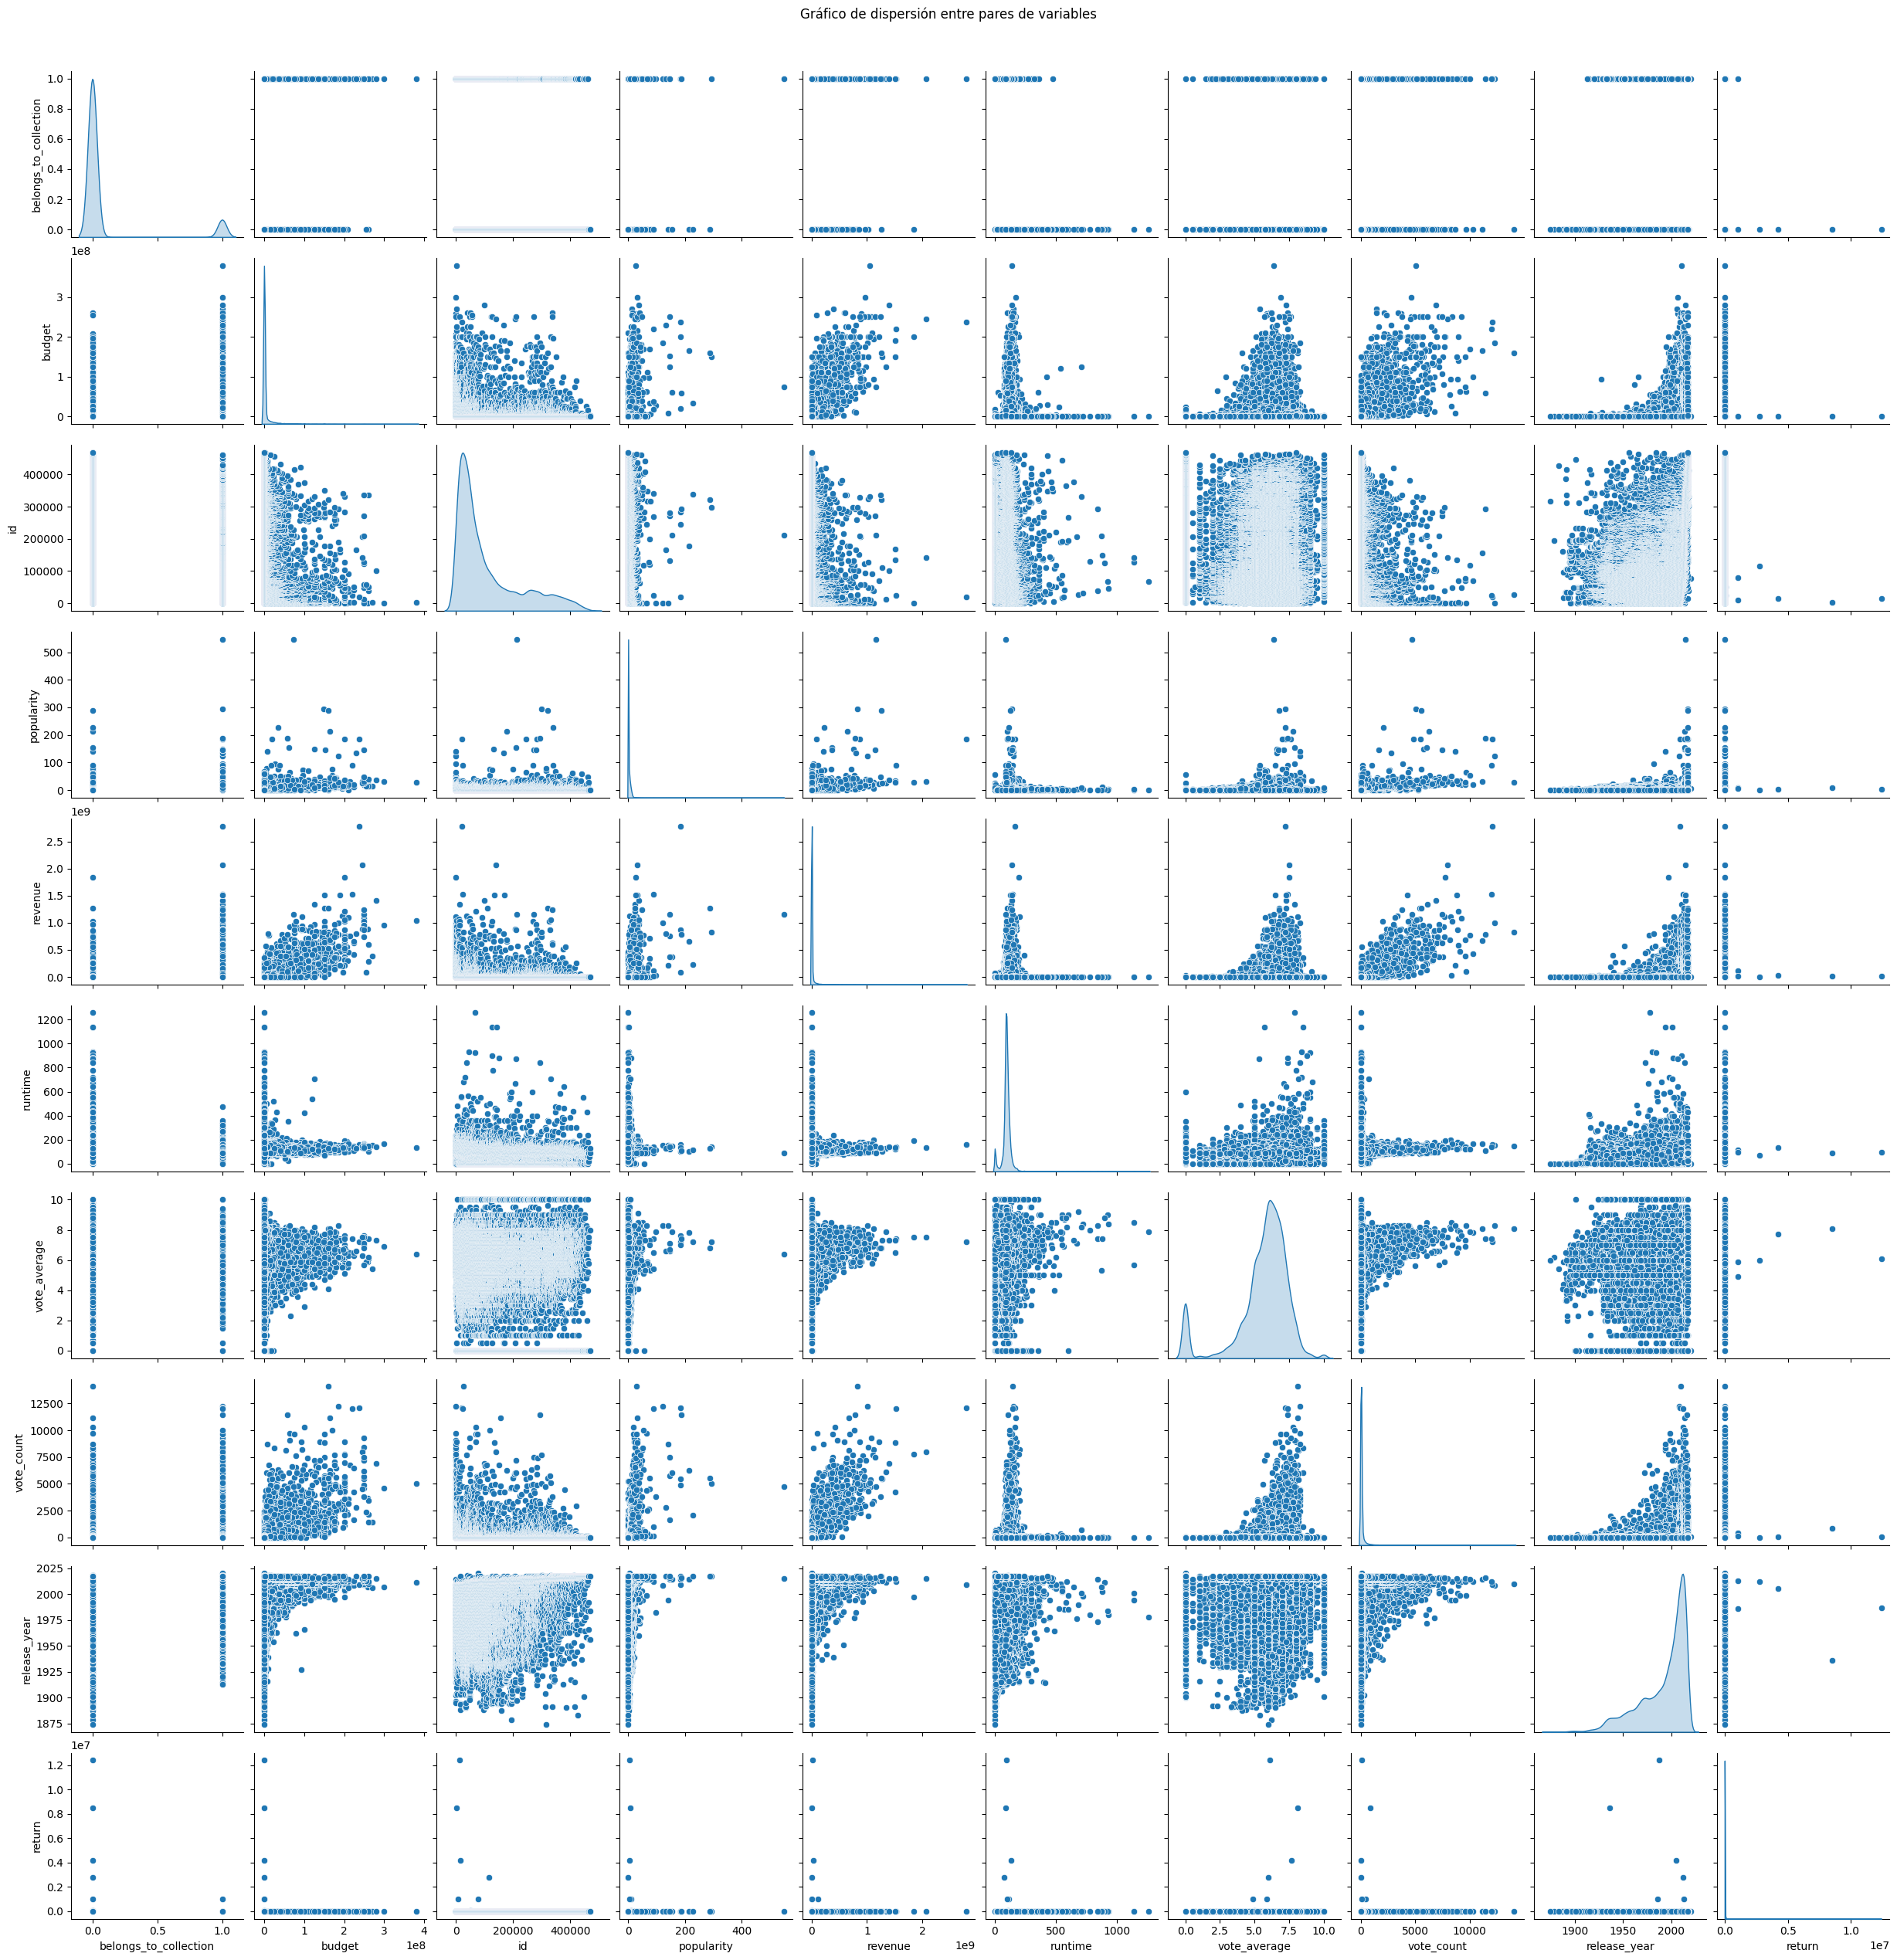

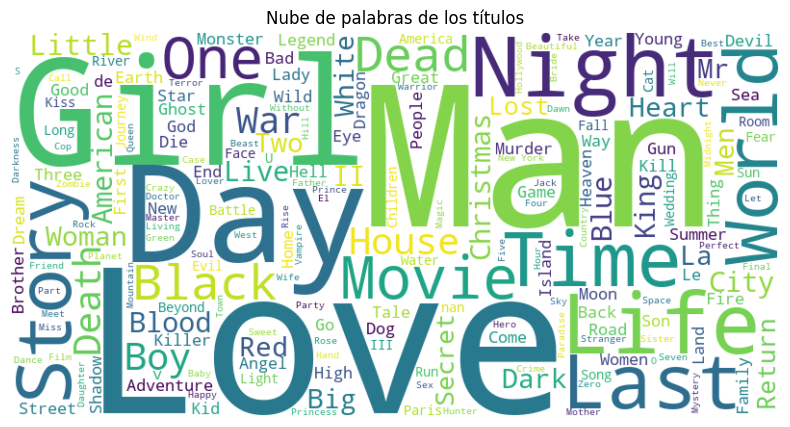

In [7]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Cargar los datos
# Asegúrate de cargar tu dataset aquí. Ejemplo:
# df = pd.read_csv("tu_archivo.csv")

# Análisis estadístico básico
print(df.describe())  # Resumen estadístico de las variables numéricas
print(df.info())      # Información general del DataFrame

# 1. Análisis de correlación entre variables numéricas
# Seleccionar solo las columnas numéricas para calcular la correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

# 2. Distribución de variables numéricas
# Histograma de variables numéricas
numeric_df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribución de las variables numéricas")
plt.show()

# Boxplot para detectar outliers en variables numéricas
plt.figure(figsize=(10, 8))
sns.boxplot(data=numeric_df, orient="h")
plt.title("Boxplot de las variables numéricas para detectar outliers")
plt.show()

# 3. Análisis de relaciones entre variables
# Gráfico de dispersión entre pares de variables relevantes
sns.pairplot(numeric_df, diag_kind="kde")
plt.suptitle("Gráfico de dispersión entre pares de variables", y=1.02)
plt.show()

# 4. Generar una nube de palabras para la columna 'title'
texto = " ".join(str(titulo) for titulo in df["title"])  # Reemplazar 'columna_texto' por 'title'
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras de los títulos")
plt.show()


OBSERVACIONES

Variables con alta correlación positiva:
revenue (ingresos) y budget (presupuesto): tienen una alta correlación positiva (0.77), lo que sugiere que, en general, cuanto mayor es el presupuesto de una película, mayores son los ingresos.
vote_count (conteo de votos) y revenue: muestran también una fuerte correlación positiva (0.81), indicando que las películas que generan más ingresos tienden a tener un mayor número de votos.
vote_count y budget: presentan una correlación positiva alta (0.68), lo que sugiere que las películas con mayores presupuestos tienden a recibir más votos.
Variables con correlación moderada:
popularity (popularidad) y revenue: tienen una correlación moderada (0.51), indicando que las películas con más ingresos tienden a ser también más populares, aunque no siempre.
popularity y budget: con una correlación de 0.45, sugiere que las películas con mayor presupuesto tienden a ser más populares.

Conclusiones del EDA
Distribución de Variables Numéricas:

Presupuesto y Revenue: La mayoría de las películas tienen un presupuesto y ingresos bajos, con algunos outliers que indican películas de gran presupuesto y éxitos de taquilla. Estos outliers pueden representar películas muy exitosas o producciones que no recuperaron su inversión.
Retornos Altos pero Irregulares: La columna return tiene una alta variabilidad, con muchas películas mostrando retornos bajos o nulos, mientras que unas pocas generan retornos extraordinarios. Esto sugiere que el éxito financiero en la industria cinematográfica es altamente variable y no se puede garantizar solo con un alto presupuesto.
Correlación entre Variables:

Correlación Positiva entre Budget y Revenue: Existe una correlación positiva significativa entre budget y revenue, lo que indica que las películas con presupuestos más altos tienden a generar más ingresos. Sin embargo, la relación no es perfecta, lo que sugiere que otros factores también influyen en el éxito financiero.
Relación entre Popularidad y Voto: La popularidad de una película (popularity) se correlaciona positivamente con el número de votos (vote_count). Esto implica que las películas más populares son más vistas y, por ende, reciben más votos, aunque esto no necesariamente indica que sean mejor valoradas.
Análisis de Outliers:

Identificación de Outliers: Los boxplots revelan la presencia de outliers en varias variables, como budget, revenue, y runtime. La presencia de estos outliers sugiere que existen películas que se desvían significativamente de las normas de la industria, lo que puede llevar a un análisis más profundo para entender qué las hace excepcionales (por ejemplo, franquicias exitosas o películas de culto).
Nube de Palabras en Títulos:

Palabras Comunes en Títulos: La nube de palabras muestra que términos como "amor", "guerra", "vida", "historias" y "días" son comunes en los títulos de las películas. Esto sugiere que los temas románticos y dramáticos son predominantes en las producciones cinematográficas. Esta información puede ser valiosa para construir un sistema de recomendación basado en el contenido.
Patrones Temporales:

Tendencias en Producción: Un análisis de la columna release_year puede mostrar si la cantidad de películas producidas ha aumentado en años recientes, lo que puede indicar un crecimiento en la industria cinematográfica, en especial con el auge de las plataformas de streaming.